**Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from datasets import load_dataset
import evaluate

#let's make longer output readable without horizontal scrolling
from pprint import pprint

import warnings

import re

/home/ubuntu/w266/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Necessary Functions**

In [2]:
import inspect

def get_default_args(func):
    signature = inspect.signature(func)
    return {
        k: v.default
        for k, v in signature.parameters.items()
        if v.default is not inspect.Parameter.empty
    }

In [3]:
def data_organize(sample_index):

    article = []
    summary = []

    for i in sample_index["index"]:
        summary.append(dataset["train"][i]['summary'])
        article.append(dataset["train"][i]['text'])

    return article, summary

**Data**

In [4]:
dataset = load_dataset("csebuetnlp/xlsum", "english")

Found cached dataset xlsum (/home/ubuntu/.cache/huggingface/datasets/csebuetnlp___xlsum/english/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce)
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.52it/s]


In [5]:
# EDA
len(dataset['train'])

306522

In [6]:
# EDA
dataset['train'][1]

{'id': 'uk-scotland-highlands-islands-11069985',
 'url': 'https://www.bbc.com/news/uk-scotland-highlands-islands-11069985',
 'title': 'Huge tidal turbine installed at Orkney test site',
 'summary': 'The massive tidal turbine AK1000 has been installed in 35m (114.8ft) of water at a test site in Orkney.',
 'text': 'Atlantis Resources unveiled the marine energy device at Invergordon ahead of it being shipped to Kirkwall. Trials on the device will now be run at the European Marine Energy Centre test site off Eday. The device stands 22.5m (73ft) tall, weighs 1,300 tonnes and has two sets of blades on a single unit. It could generate enough power for 1,000 homes.'}

**Sampling for Train, Val, and Test sets for all XL Sum**

In [7]:
index = pd.DataFrame({"index": list(range(len(dataset['train'])))})
sample_index = index.sample(n=2000, replace=False, random_state=1004)
sample_index[:5]

,index
235420,235420
172024,172024
253546,253546
224954,224954
214134,214134


In [ ]:
article, summary = data_organize(sample_index)

In [ ]:
d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('../w266_projectxl_sum_sample_train.csv', index = False)
#df.head(5)

In [ ]:
d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('../w266_project/xl_sum_sample_val.csv', index = False)
#df.head(5)

In [ ]:
d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('../w266_project/xl_sum_sample_test.csv', index = False)
#df.head(5)

**EDA on Train**

In [9]:
id = []
url = []
title = []
article = []
article_num_sentences = []
article_num_characters = []
article_num_words = []
summary = []
summary_num_sentences = []
summary_num_characters = []
summary_num_words = []

for i in sample_index["index"][0:1000]:
    id.append(dataset["train"][i]['id'])
    url.append(dataset["train"][i]['url'])
    title.append(dataset["train"][i]['title'])
    summary.append(dataset["train"][i]['summary'])
    summary_num_sentences.append(len(dataset["train"][i]['summary'].split(".")))
    summary_num_words.append(len(dataset["train"][i]['summary'].split(" ")))
    summary_num_characters.append(len(dataset["train"][i]['summary']))
    article.append(dataset["train"][i]['text'])
    article_num_sentences.append(len(dataset["train"][i]['text'].split(".")))
    article_num_characters.append(len(dataset["train"][i]['text']))
    article_num_words.append(len(dataset["train"][i]['text'].split(" ")))
    

In [10]:
d = {'id': id, 'url': url, "title": title, 'article': article, "article_num_sentences": article_num_sentences, "article_num_words": article_num_words, "article_num_characters": article_num_characters, 'summary': summary,"summary_num_sentences": summary_num_sentences,"summary_num_words": summary_num_words, "summary_num_characters": summary_num_characters}
df = pd.DataFrame(data=d)
df.head(5)

,id,url,title,article,article_num_sentences,article_num_words,article_num_characters,summary,summary_num_sentences,summary_num_words,summary_num_characters
0,uk-england-cornwall-55191422,https://www.bbc.com/news/uk-england-cornwall-5...,Care home manager: 'It felt like we were losin...,By Rebecca Ricks & Johnny O'SheaBBC Spotlight ...,37,697,3755,"During the spring, at the height of the Covid-...",2,27,147
1,uk-43893709,https://www.bbc.com/news/uk-43893709,Tafida Raqeeb: Who decides the care of sick ch...,"By Rachel SchraerBBC Reality Check So, why did...",33,760,4531,"The parents of five-year-old Tafida Raqeeb, wh...",2,20,121
2,uk-politics-57050659,https://www.bbc.com/news/uk-politics-57050659,Labour reshuffle: Anneliese Dodds out in Starm...,Anneliese Dodds will now become the Labour Par...,36,846,4845,Sir Keir Starmer has sacked his shadow chancel...,2,20,115
3,entertainment-arts-38221420,https://www.bbc.com/news/entertainment-arts-38...,Vinyl sales made more than downloads last week,By Mark SavageBBC Music reporter Vinyl sales m...,27,354,2082,More money was spent on vinyl than downloaded ...,2,15,83
4,entertainment-arts-24046991,https://www.bbc.com/news/entertainment-arts-24...,Pirates of the Caribbean sequel delayed,Disney's Pirates of The Caribbean: Dead Men Te...,14,253,1569,The next Pirates of the Caribbean film has bee...,2,15,88


In [12]:
print("min summary words", min(df['summary_num_words']))
print("max summary words", max(df['summary_num_words']))
print("mean summary sentences", np.mean(df['summary_num_sentences']))

min summary words 8
max summary words 79
mean summary sentences 2.059


min ratio 0.0044426494345718905
max ratio 0.4528301886792453
mean ratio 0.07189914101501373
median ratio 0.05816067653276956


Text(0.5, 1.0, 'Ratio of word count in summary to article')

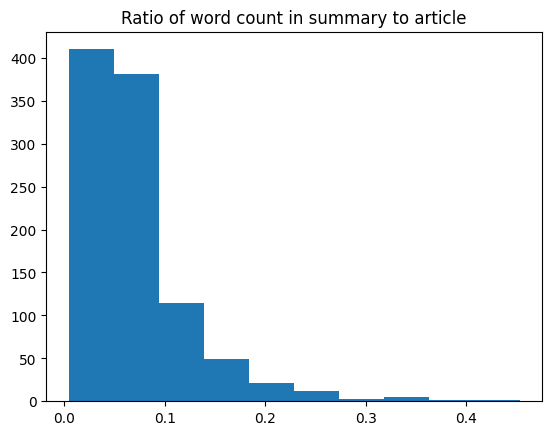

In [13]:
ratio = df["summary_num_words"]/df["article_num_words"]
print("min ratio", min(ratio))
print("max ratio", max(ratio))
print("mean ratio", np.mean(ratio))
print("median ratio", np.median(ratio))
plt.hist(ratio)
plt.title("Ratio of word count in summary to article")

Text(0.5, 1.0, 'Word Count in Summary vs Article')

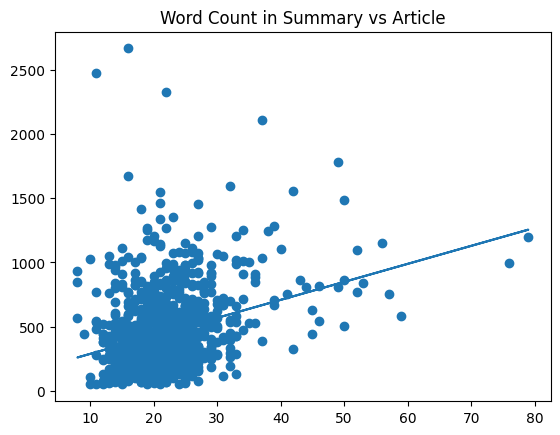

In [14]:
plt.scatter(df["summary_num_words"],df["article_num_words"])
z = np.polyfit(df["summary_num_words"],df["article_num_words"], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(df["summary_num_words"], p(df["summary_num_words"]))
plt.title("Word Count in Summary vs Article")

**Category EDA**

In [15]:
categories = []

for i in range(len(dataset['train'])):
    cat = dataset['train'][i]['id']
    result = re.sub('\d','',cat)[:-1]
    result = result.split('-')[0].split('.')[0]
    categories.append(result)

In [16]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

In [17]:
print(len(find_indices(categories, 'uk')))

172560


In [18]:
dfc = {'category': categories, 'ind': np.ones(len(categories))}
       
dfc = pd.DataFrame(data = dfc)

table = pd.pivot_table(dfc, values='ind', index=['category'], aggfunc=np.sum, sort = True)

table.sort_values(by=('ind'), ascending=False,inplace=True)

table

,ind
category,
uk,172560.0
world,55414.0
business,21872.0
entertainment,13819.0
technology,9245.0
newsbeat,7118.0
health,6425.0
science,5432.0
education,3639.0


**Train, Val, and Test sets for each category**

In [19]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

In [20]:
categories = []

for i in range(len(dataset['train'])):
    cat = dataset['train'][i]['id']
    result = re.sub('\d','',cat)[:-1]
    result = result.split('-')[0].split('.')[0]
    categories.append(result)

**Category 1: uk**

In [32]:
uk = find_indices(categories, 'uk')
index = pd.DataFrame({"index": uk})
sample_index = index.sample(n=2000, replace=False, random_state=1004)

article, summary = data_organize(sample_index)

d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_train_uk.csv', index = False)
#df.head(5)

d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_val_uk.csv', index = False)
#df.head(5)

d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_test_uk.csv', index = False)
#df.head(5)

**Category 2: world**

In [33]:
world = find_indices(categories, 'world')
index = pd.DataFrame({"index": world})
sample_index = index.sample(n=2000, replace=False, random_state=1004)

article, summary = data_organize(sample_index)

d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_train_world.csv', index = False)
#df.head(5)

d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_val_world.csv', index = False)
#df.head(5)

d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_test_world.csv', index = False)
#df.head(5)

**Category 3: business**

In [34]:
business = find_indices(categories, 'business')
index = pd.DataFrame({"index": business})
sample_index = index.sample(n=2000, replace=False, random_state=1004)

article, summary = data_organize(sample_index)

d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_train_business.csv', index = False)
#df.head(5)

d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_val_business.csv', index = False)
#df.head(5)

d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_test_business.csv', index = False)
#df.head(5)

**Category 4: entertainment**

In [35]:
entertainment = find_indices(categories, 'entertainment')
index = pd.DataFrame({"index": entertainment})
sample_index = index.sample(n=2000, replace=False, random_state=1004)

article, summary = data_organize(sample_index)

d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_train_entertainment.csv', index = False)
#df.head(5)

d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_val_entertainment.csv', index = False)
#df.head(5)

d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_test_entertainment.csv', index = False)
#df.head(5)

**Category 5: technology**

In [36]:
technology = find_indices(categories, 'technology')
index = pd.DataFrame({"index": technology})
sample_index = index.sample(n=2000, replace=False, random_state=1004)

article, summary = data_organize(sample_index)

d = {'text': article[:1000],  'summary': summary[:1000]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_train_technology.csv', index = False)
#df.head(5)

d = {'text': article[1000:1100],  'summary': summary[1000:1100]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_val_technology.csv', index = False)
#df.head(5)

d = {'text': article[1100:1200],  'summary': summary[1100:1200]}
df = pd.DataFrame(data=d)
df.to_csv('xl_sum_sample_test_technology.csv', index = False)
#df.head(5)